In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [28]:
df = pd.read_csv("diabetes.csv")

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [33]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [34]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df['Outcome']==0)

(500, 1000)

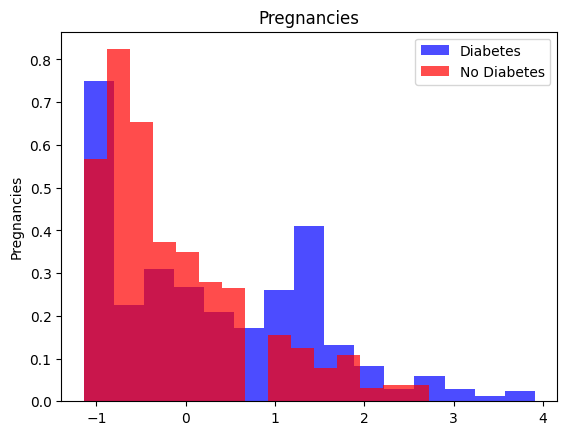

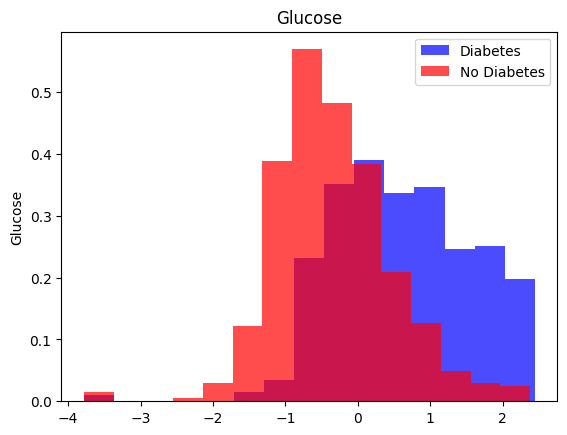

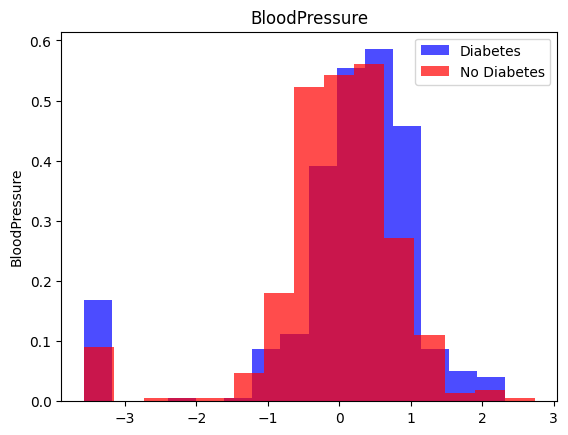

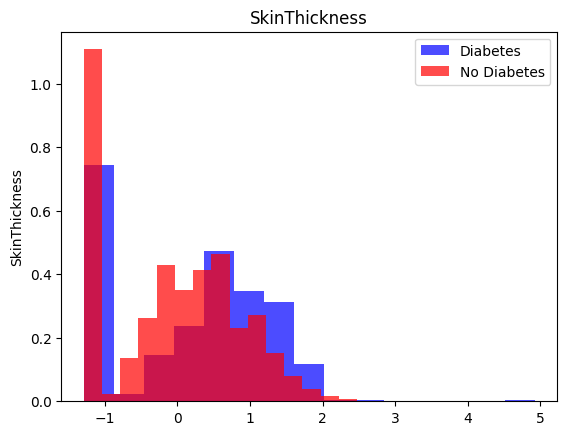

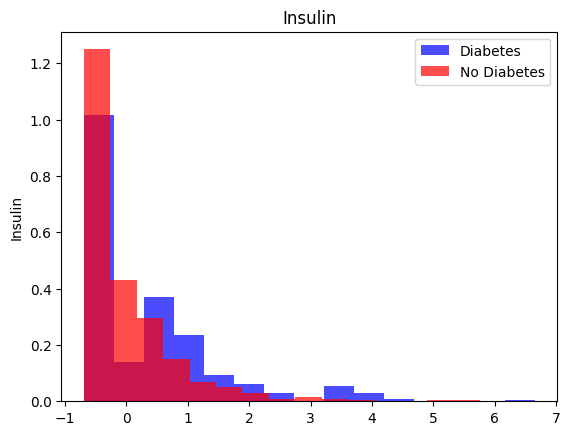

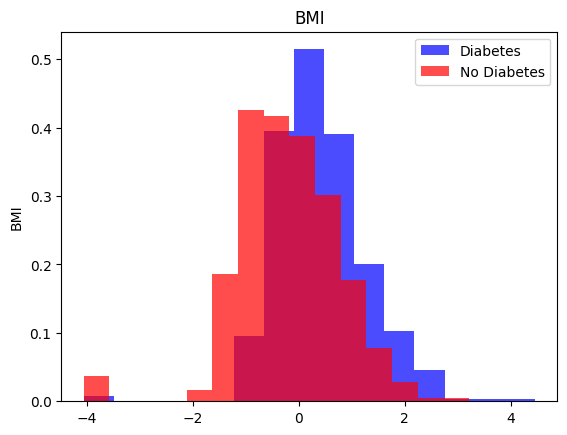

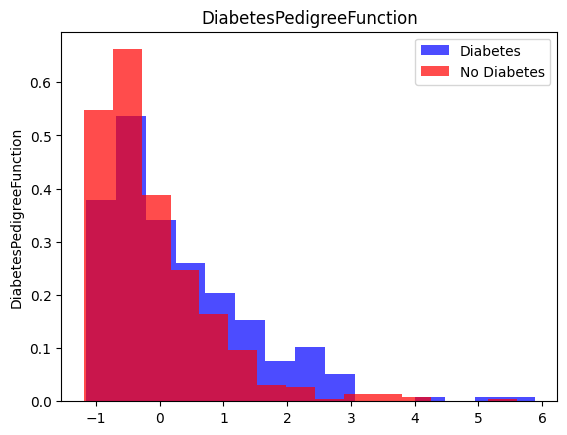

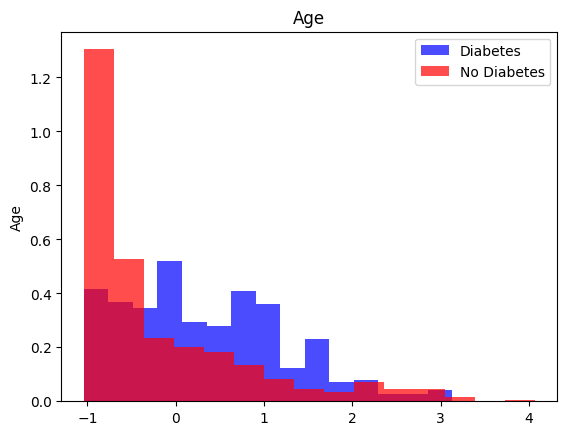

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label='Diabetes',alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red',label='No Diabetes', alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("N")
  plt.ylabel(label)
  plt.legend()
  plt.show()

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [14]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5583


[0.6911643147468567, 0.5583333373069763]

In [15]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5400


[0.6857695579528809, 0.5400000214576721]

In [16]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6735 - accuracy: 0.6083 - val_loss: 0.6513 - val_accuracy: 0.6050
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6833 - val_loss: 0.6273 - val_accuracy: 0.6250
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7033 - val_loss: 0.6024 - val_accuracy: 0.6900
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7250 - val_loss: 0.5816 - val_accuracy: 0.6950
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7367 - val_loss: 0.5605 - val_accuracy: 0.7250
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7433 - val_loss: 0.5436 - val_accuracy: 0.7350
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7433 - val_loss: 0.5277 - val_accuracy: 0.7350
Epoch 8/20
38/38 [==